<a href="https://colab.research.google.com/github/Mightynasty/airbnb_seattle/blob/master/Airbnb_seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [0]:
seattle = pd.read_csv('listings.csv')

In [0]:
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [0]:
print (f'Dataset shape: {seattle.shape} \nColumns types: \n {seattle.dtypes}')

Dataset shape: (3818, 92) 
Columns types: 
 id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                      

In [0]:
#checking out null values
seattle.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [0]:
#changing price format
seattle.price = seattle.price.replace('[\$,]', '', regex=True).astype(float)

In [0]:
p_mean = seattle.price.mean()
p_median = seattle.price.median()

In [0]:
print(f'Mean: {p_mean}\nMedian: {p_median}')

Mean: 127.97616553169199
Median: 100.0


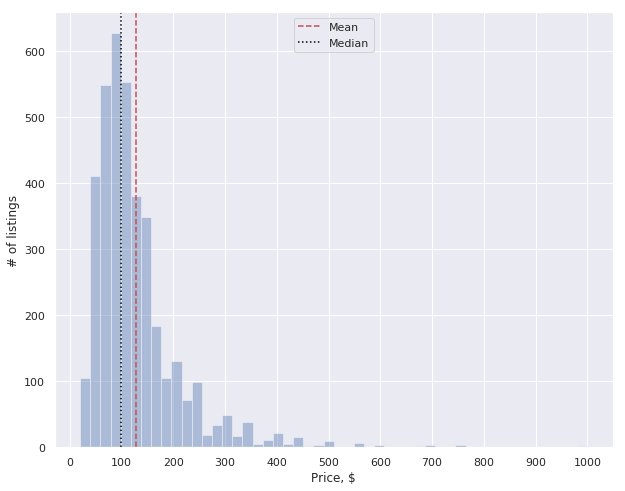

In [0]:
fig, ax = plt.subplots(figsize = (10,8))
ax.axvline(p_mean, color='r', linestyle='--')
ax.axvline(p_median, color='black', linestyle=':', )
sns.distplot(seattle.price, kde=False)
plt.xlabel('Price, $')
plt.ylabel('# of listings')
plt.xticks (np.arange(0, 1050, step=100))
plt.legend({'Mean':p_mean,'Median':p_median}, loc = 'upper center');

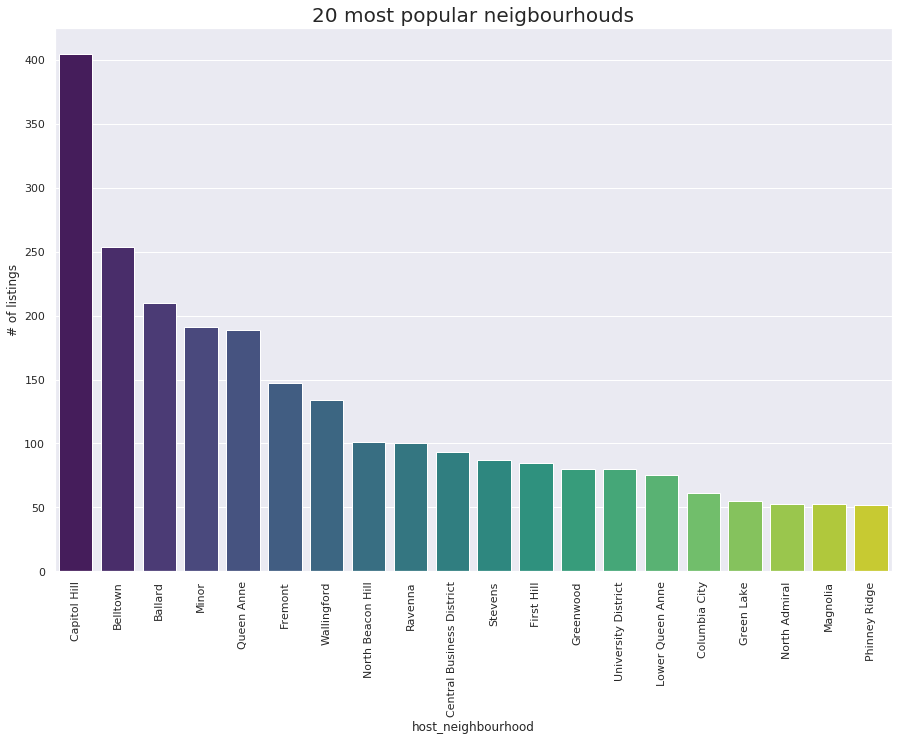

In [0]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.countplot(x = seattle.host_neighbourhood, palette = 'viridis', order = seattle.host_neighbourhood.value_counts().iloc[:20].index )
plt.xticks(rotation = 'vertical')
plt.ylabel('# of listings')
plt.title('20 most popular neigbourhouds', fontsize = '20');

In [0]:
#dropping columns with more than 50% missing values
seattle = seattle.drop(seattle.columns[seattle.isnull().sum() / len(seattle) > 0.5], axis=1);
seattle.shape

(3818, 88)

In [0]:
#columns that have more than 30% NA:notes, weekly price and security deposit
seattle.columns[seattle.isnull().sum() / len(seattle) > 0.3]

Index(['notes', 'weekly_price'], dtype='object')

In [0]:
#removing booleans for superhost column
seattle.host_is_superhost= pd.get_dummies(seattle.host_is_superhost)



In [0]:
seattle = seattle.dropna(axis = 0, subset = ['review_scores_rating'])

In [0]:
seattle.host_response_rate = seattle.host_response_rate.str.strip('%').astype(float)


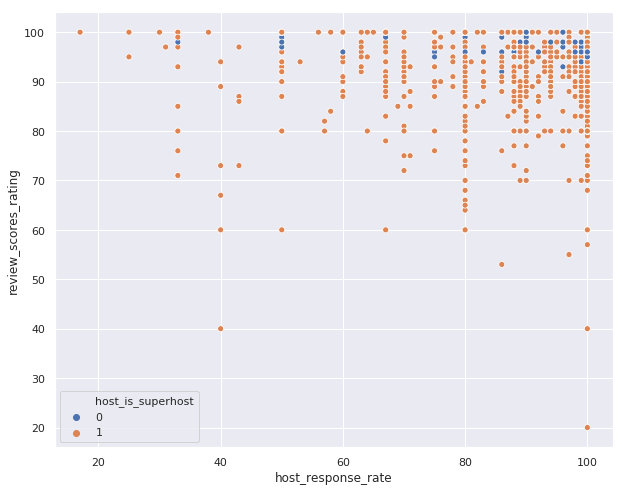

In [0]:
#scatterplot with reponse rate/property review and correlation with SUPERHOSt status(min requirements for superhost here https://blog.beyondpricing.com/how-do-i-become-an-airbnb-superhost/)

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = seattle.host_response_rate, y = seattle.review_scores_rating, hue= seattle.host_is_superhost, data = seattle);

*Having high scores and being 100% responsive doesn't guarantee becoming a superhost; though there's some misconception with the rules - they prescribe 90% of response rate and at least 80% of rating
*

TypeError: ignored

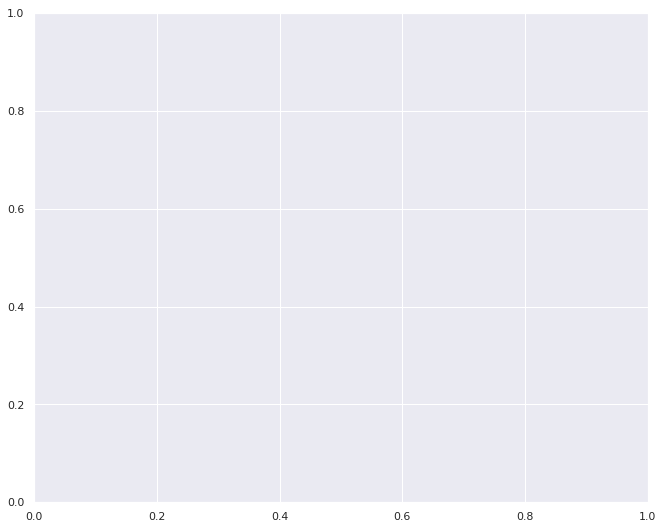

In [0]:
#what's the correlation of price with other parameters?
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(seattle.fillna(method='ffill'),  cmap = cmap, annot = True, center = 0, squaare = True)

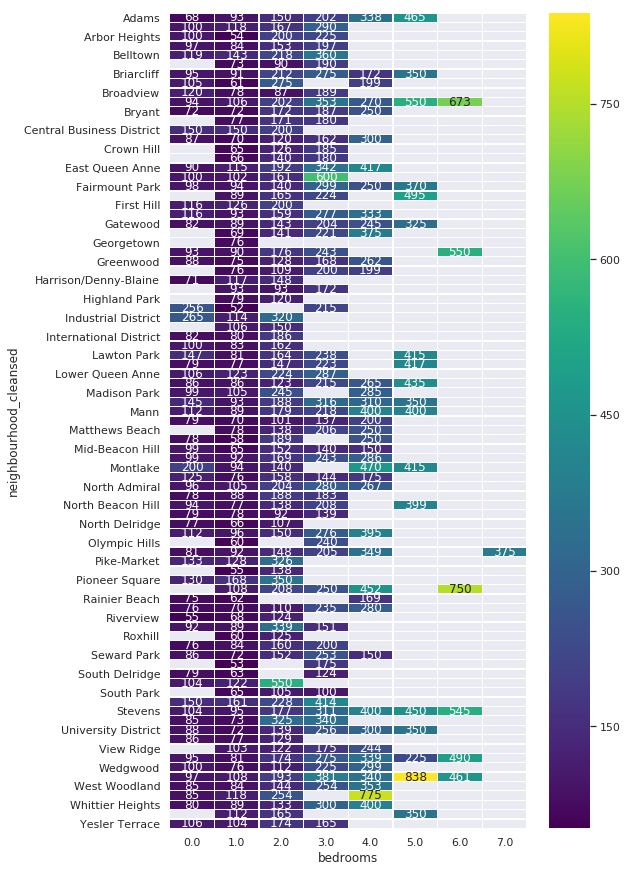

In [0]:
plt.figure(figsize=(8,15))
sns.heatmap(seattle.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f", cmap='viridis',linewidths = .3)

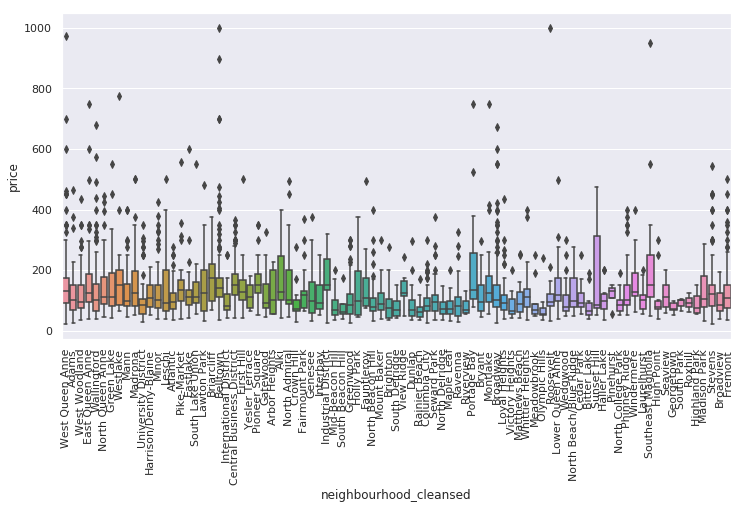

In [0]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price',  data = seattle)
xt = plt.xticks(rotation=90)

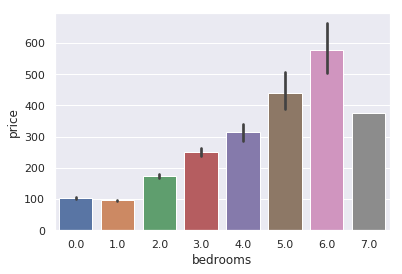

In [0]:
sns.barplot(x = "bedrooms", y = "price", data = seattle);
